## capstone project notebook

In [42]:
#Load dataset
import pandas as pd
url = "https://raw.githubusercontent.com/callxpert/datasets/master/Loan-applicant-details.csv"
names = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
dataset = pd.read_csv(url, names=names)

In [43]:
print(dataset.head(5))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0         128               360   
1             3000                0.0          66               360   
2             2583             2358.0         120               360   
3             6000                0.0         141               360   
4             5417             4196.0         267               360   

   Credit_History Property_Area Loan_Status  
0               1         Rural           N  
1               1         Urban           Y  
2               1   

In [44]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])

In [45]:
dataset.shape

(480, 13)

In [46]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

In [55]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn import metrics

array = dataset.values
X = dataset.iloc[:,6:11]
Y = dataset.iloc[:,12]
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (384, 5) (384,)
Test set: (96, 5) (96,)


# logistic regression

In [ ]:
# K is the number of classes, in Logistic Regression k = 2

In [ ]:
# accuracy evaluation

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score


#model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
#Y=Y.astype('int')
model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
#model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))

0.75


In [57]:
print(predictions)

[1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

In [ ]:
#confusion matrix 

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, model.predict(X_test))
conf

## KNN

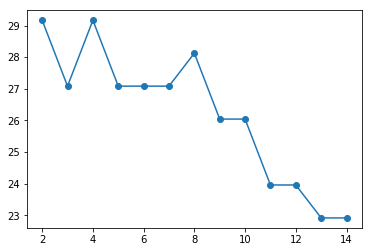

In [62]:
# find the best value of k
from sklearn import neighbors
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [ ]:
# so, the best value of k is 13

In [75]:
# find the accuracy
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.770833333333


# Decision tree

In [ ]:
# the number of classes k = 2

In [58]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))

0.697916666667


# Random forest

In [60]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.75


# SVM

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
# in SVM k=2

In [65]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [68]:
yhat = clf.predict(x_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [69]:
# Evaluation using f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [70]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.69970238095238102

In [71]:
# Evaluation using jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.72916666666666663